In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv("../preprocessed_data/Linux_process_LE-MM.csv")
data

,PID,TRUN,TSLPI,TSLPU,NICE,PRI,RTPR,CPUNR,EXC,CPU,Status_encoded,State_encoded,POLI_encoded,CMD_encoded,label
0,0.043209,0.0,0.328571,0.0,0.0,0.863309,0.0,0.666667,0.0,0.0325,3,3,2,153,0
1,0.008354,0.0,0.014286,0.0,0.0,0.863309,0.0,0.000000,0.0,0.0225,3,3,2,155,0
2,0.042056,0.0,0.900000,0.0,0.0,0.863309,0.0,1.000000,0.0,0.0150,3,3,2,197,0
3,0.033933,0.0,0.114286,0.0,0.0,0.863309,0.0,0.000000,0.0,0.0150,3,3,2,177,0
4,0.034375,0.0,0.071429,0.0,0.0,0.863309,0.0,0.000000,0.0,0.0100,3,3,2,275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.058917,0.0,0.014286,0.0,0.0,0.863309,0.0,1.000000,0.0,0.0000,0,3,2,160,0
999996,0.021335,0.0,0.014286,0.0,0.0,0.863309,0.0,1.000000,0.0,0.0000,0,3,2,160,0
999997,0.021393,0.0,0.014286,0.0,0.0,0.863309,0.0,0.000000,0.0,0.0000,0,3,2,160,0
999998,0.021431,0.0,0.014286,0.0,0.0,0.863309,0.0,1.000000,0.0,0.0000,0,3,2,160,0


In [ ]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [2]:
X = data.drop(columns=['label']).values
y = data['label'].values

In [3]:
window_size = 30
X_windows = []
y_windows = []

for i in range(len(X) - window_size + 1):
    X_windows.append(X[i:i + window_size])
    y_windows.append(y[i + window_size - 1])  # ラベルはウィンドウの最後のデータに対応させます

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)


# トレーニングデータとテストデータに分割
X_train, X_temp, y_train, y_temp = train_test_split(X_windows, y_windows, test_size=0.3, random_state=42, stratify=y_windows)
# テストデータをさらに検証データとテストデータに分割
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTMモデルの構築
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# モデルの概要
model.summary()

2024-11-01 15:05:51.443219: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 15:05:51.750806: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-01 15:05:52.321821: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-01 15:05:52.773148: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/t

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,051 (50.98 KB)

 Trainable params: 13,051 (50.98 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# モデルの訓練
# モデルの訓練
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)


Epoch 1/10


2024-11-01 15:05:55.501278: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


10938/10938 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.8772 - loss: 0.2799 - val_accuracy: 0.8799 - val_loss: 0.2294
Epoch 2/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.8808 - loss: 0.2216 - val_accuracy: 0.8816 - val_loss: 0.2259
Epoch 3/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.8826 - loss: 0.2182 - val_accuracy: 0.8832 - val_loss: 0.2208
Epoch 4/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 73s 7ms/step - accuracy: 0.8848 - loss: 0.2146 - val_accuracy: 0.8883 - val_loss: 0.2091
Epoch 5/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.8881 - loss: 0.2101 - val_accuracy: 0.8901 - val_loss: 0.2066
Epoch 6/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - accuracy: 0.8904 - loss: 0.2064 - val_accuracy: 0.8907 - val_loss: 0.2089
Epoch 7/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - accuracy: 0.8921 - loss: 0.2038 - val_accuracy: 0.8922 - val_loss: 0.2027
Epoch 8/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.8929 - lo

In [6]:
# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.4f}')

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8921 - loss: 0.2090
Test Accuracy: 0.8932


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 4s 859us/step


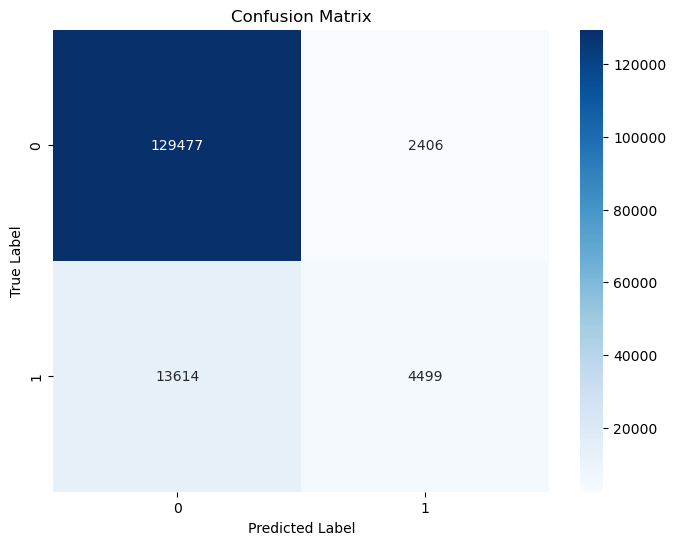

              precision    recall  f1-score   support

           0       0.90      0.98      0.94    131883
           1       0.65      0.25      0.36     18113

    accuracy                           0.89    149996
   macro avg       0.78      0.62      0.65    149996
weighted avg       0.87      0.89      0.87    149996



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 予測の実行
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 閾値0.5でクラスに変換

# 混同行列の計算
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 混同行列の表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 精度、適合率、再現率、F1スコアのレポート
print(classification_report(y_test, y_pred_classes))


In [ ]:
import tensorflow as tf

# TensorFlowのバージョンを確認
print("TensorFlow version:", tf.__version__)

# 利用可能なGPUリストを表示
print("Available GPU devices:", tf.config.list_physical_devices('GPU'))
